# Machine Learning
# Assignment 4: Decision Trees

Please write your full name here
- **Name** : "Hasnaa Hossam"

## Instructions
- Please place your code where you're asked to. Do not change any other code.
- Submit the notebook with your solutions and keep the cell outputs.
- Please name your notebook in the following format "assignment4_FirstnameLastname.ipynb"
- Late submissions will be penalized.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

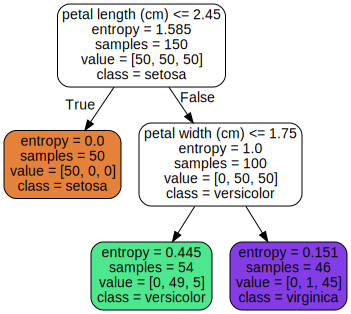

In [ ]:
# Answer:

from graphviz import Source
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

graph = Source(dot_data)
display(graph)

## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

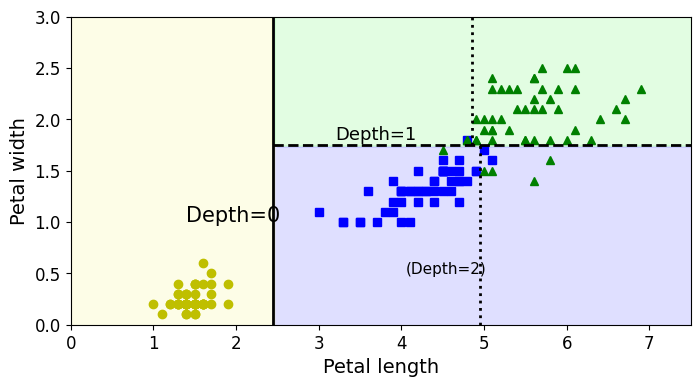

In [ ]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1. What's the output entropy in each block?

Left block (petal_length <= 2.45): <br>
**entropy = 0**, the block contains only setosa flower. Means the region is perfectly pure contains only one class. <br>


Right block (petal_length > 2.45):<br>
**entropy = 1**, the block contains versicolor and virginica flowers. means the region is impure. <br>
<br>

2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? <br>

max_depth = 1:  One split. Underfitting Can't separate versicolor and virginica flowers.

max_depth = 2:  Two splits. fits data better than max_dapth=1, can separate versicolor and virginica.

max_depth = 10:  Tree becomes very deep. Overfitting bad for unseen data.  

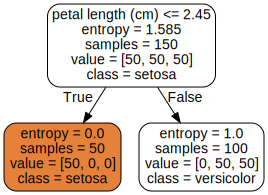

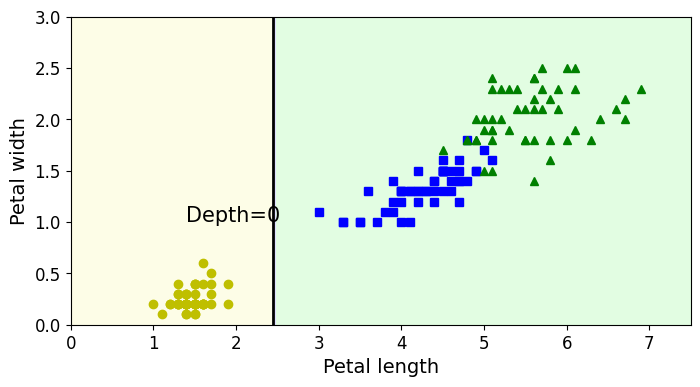

In [ ]:
####### YOUR CODE HERE
####  max_depth=1 Solution

tree_clf_1d = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
tree_clf_1d.fit(X, y)

dot_data = export_graphviz(
    tree_clf_1d,
    out_file=None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

graph = Source(dot_data)
display(graph)


plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf_1d, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.show()

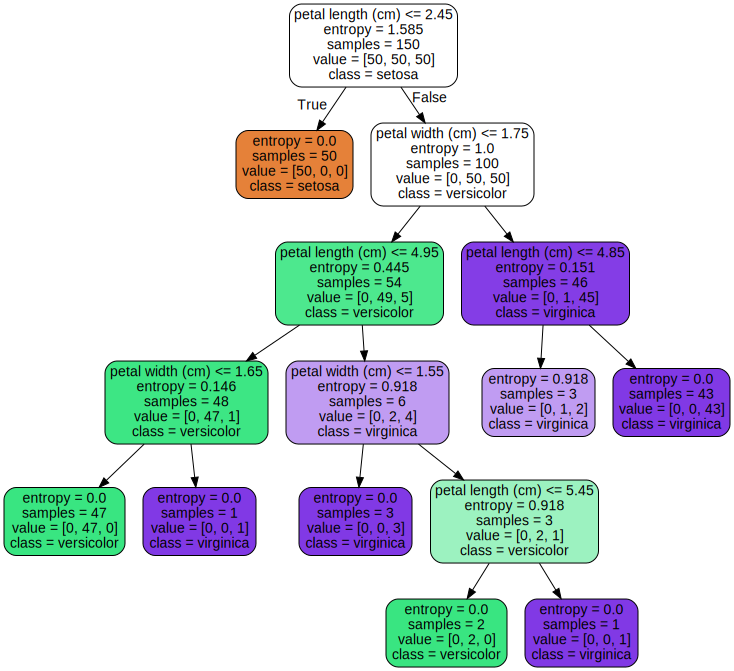

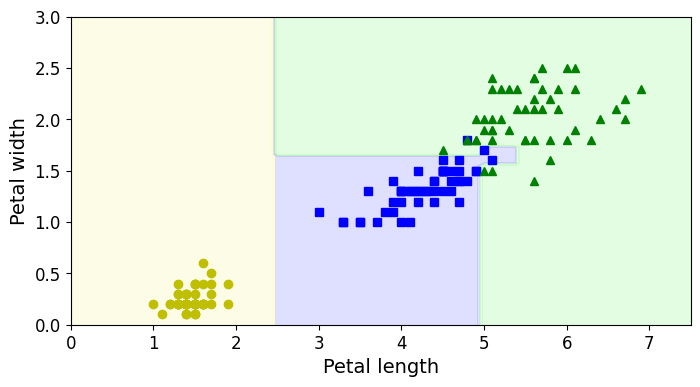

In [ ]:
####### YOUR CODE HERE
####  max_depth=10 Solution

tree_clf_10d = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_clf_10d.fit(X, y)

dot_data = export_graphviz(
    tree_clf_10d,
    out_file=None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

graph = Source(dot_data)
display(graph)


plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf_10d, X, y)

plt.show()

### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1. Probability of class setosa = 0 ; because petal length is greater than 2.45 <br>
  Probability of class veriscolor = 49/54 = 0.907
<br>
  Probability of class virginica = 5/54 = 0.0925

In [ ]:
######### Your code for (2)
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the data
2. Plot the resulting decision boundaries
3. Print the classifier score on training data

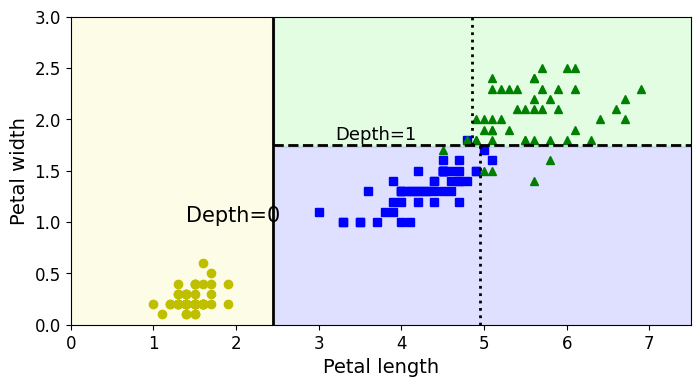

Score at max_depth=2 is 0.96


In [ ]:
##### YOUR CODE HERE
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.show()

y_pred = tree_clf.predict(X)
score = accuracy_score(y_pred, y)
print(f"Score at max_depth=2 is {score}")

The following cell rotates the data by angle **30**

In [ ]:
angle = np.pi / 180 * 30
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

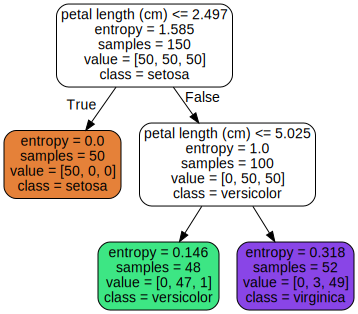

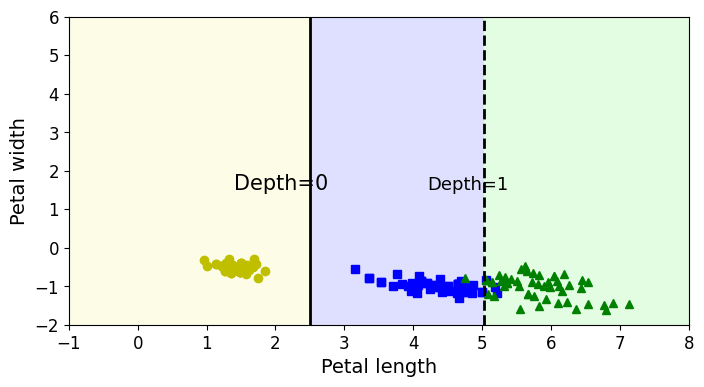

Score at max_depth=2 after data rotation is 0.973


In [ ]:
##### YOUR CODE HERE

from sklearn.metrics import accuracy_score

rotated_tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
rotated_tree_clf.fit(Xr, y)

plt.figure(figsize=(8, 4))

# Answer:

from graphviz import Source
from sklearn.tree import export_graphviz

dot_data = export_graphviz(
    rotated_tree_clf,
    out_file=None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

graph = Source(dot_data)
display(graph)

plot_decision_boundary(rotated_tree_clf, Xr, y, axes=[-1, 8, -2, 6])

plt.plot([2.497, 2.497], [-2, 6], "k-", linewidth=2)
plt.plot([5.025, 5.025], [-2, 6], "k--", linewidth=2)
plt.text(1.4, 1.5, "Depth=0", fontsize=15)
plt.text(4.2, 1.5, "Depth=1", fontsize=13)
plt.show()

y_pred = rotated_tree_clf.predict(Xr)
score = accuracy_score(y_pred, y)
print(f"Score at max_depth=2 after data rotation is {score:.3f}")

### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [ ]:
import numpy as np
def plot_logistic_regression(clf, X, y, axes, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

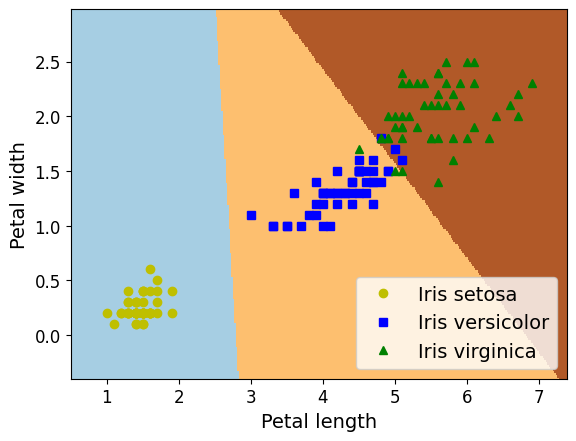

Score of Logistic Regression model is 0.967


In [ ]:
##### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

plot_logistic_regression(log_reg, X, y, axes=[0, 7.5, 0, 3])

y_pred = log_reg.predict(X)
score = accuracy_score(y_pred, y)

print(f"Score of Logistic Regression model is {score:.3f}")

**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

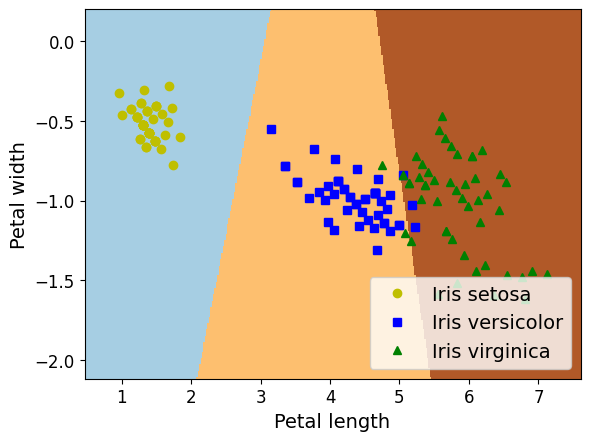

Score of Logistic Regression model after rotation is 0.967


In [ ]:
###### YOUR CODE HERE

log_reg_r = LogisticRegression()
log_reg_r.fit(Xr, y)

plot_logistic_regression(log_reg_r, Xr, y, axes=[0, 7.5, 0, 3])

y_pred = log_reg_r.predict(Xr)
score = accuracy_score(y_pred, y)

print(f"Score of Logistic Regression model after rotation is {score:.3f}")

### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1. Logistic regresion score doesn't change.<br>
Decision tree score does change slightly after rotation. score increased from 0.96 to 0.973


2. Logistic regresion score doesn't change. It's invarient to rotation, because it learns single linear decision boundry (straight line).<br>
Decision Trees are sensitive to rotation because they split the space axis-aligned (parallel to the feature axes).

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.35)`.

In [ ]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=10000, noise=0.35,random_state=0)

2. Split it into a training set and a test set using train_test_split().

In [ ]:
from sklearn.model_selection import train_test_split

X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.2,random_state=0)

3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier.
    - Choose reasonable values for each hyperparameter.
    - Use the training data portion.

In [ ]:
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier()

grid_params = {
    'max_depth': [2, 5, 10, 15],
    'max_leaf_nodes': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(dt_clf, grid_params, cv=5, verbose=1)
grid.fit(X_train_moons, y_train_moons)

print(f"Best parameters: {grid.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 10, 'max_leaf_nodes': 20, 'min_samples_split': 2}


4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [ ]:
from sklearn.metrics import accuracy_score

best_model = grid.best_estimator_
best_model.fit(X_train_moons, y_train_moons)

y_pred = best_model.predict(X_test_moons)
print(f"Best model score: {accuracy_score(y_pred, y_test_moons)}")

Best model score: 0.8925


## Question 5 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. The blue line (max_depth=2) is simpler than the green line (max_depth=5).
The blue line splits data into few big regions while the green line make more splits (jump up or down).


2. The model with max_depth=5 has a higher variance error, because it overfits the data and it doing bad for unseen data. It's sensitive to small changes in the data that's high variance


3. The model with max_depth=2 has a higher bias error, because it's to simple to capture the complex patterns in the data. It miss actual details in the data that's high bias. It underfits the data


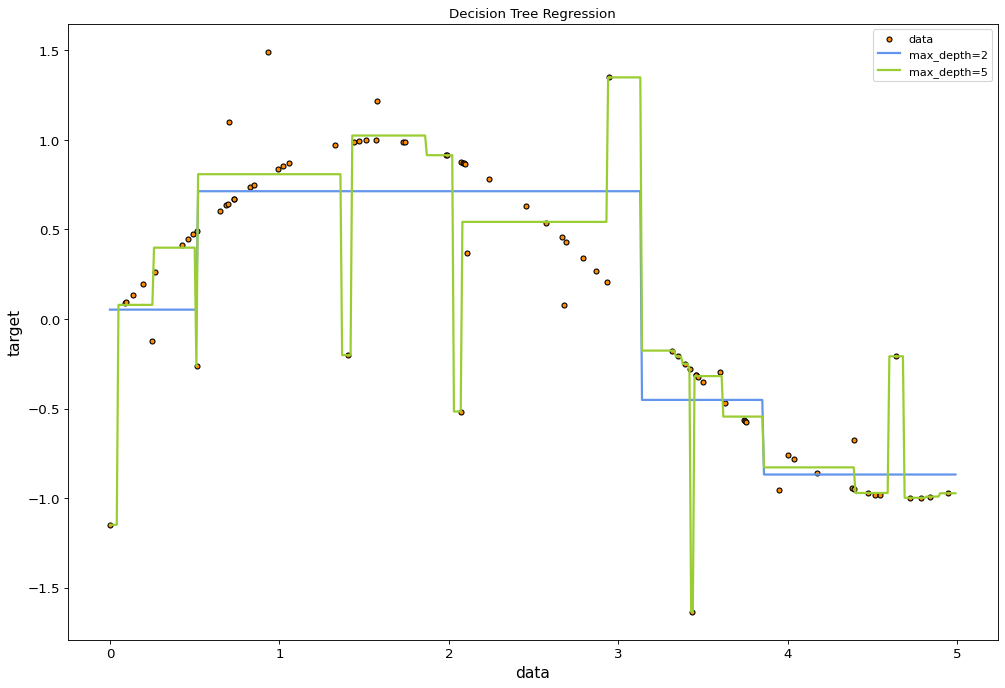

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()